In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns; sns.set()  # for plot styling
import locale

In [17]:
import seaborn as sns

In [6]:
df_comercial=pd.read_excel("Marcas1-10Unificado.xlsx", sheet_name='Sheet1')

In [9]:
df_comercial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246221 entries, 0 to 246220
Columns: 166 entries, Unnamed: 0 to categoria 99
dtypes: datetime64[ns](1), float64(8), int64(150), object(7)
memory usage: 311.8+ MB


In [10]:
df_comercial.head()

,Unnamed: 0,fecha_de_venta,tienda,ventas,muelle,hora_entera,transacciones,semana,anio_entero,mes_entero,...,categoria 90,categoria 91,categoria 92,categoria 93,categoria 94,categoria 95,categoria 96,categoria 97,categoria 98,categoria 99
0,0,2022-01-01,TIENDA 1,6666120.0,MUELLE INTERNACIONAL ORIENTE,0,15.0,52,2022,1,...,0,0,0,0,0,0,0,0,0,0
1,1,2022-01-01,TIENDA 1,7080880.0,MUELLE INTERNACIONAL ORIENTE,1,15.0,52,2022,1,...,0,0,0,0,0,0,0,0,0,0
2,2,2022-01-01,TIENDA 1,168060.0,MUELLE INTERNACIONAL ORIENTE,2,1.0,52,2022,1,...,0,0,0,0,0,0,0,0,0,0
3,3,2022-01-01,TIENDA 1,0.0,MUELLE INTERNACIONAL ORIENTE,3,0.0,52,2022,1,...,0,0,0,0,0,0,0,0,0,0
4,4,2022-01-01,TIENDA 1,0.0,MUELLE INTERNACIONAL ORIENTE,4,0.0,52,2022,1,...,0,0,0,0,0,0,0,0,0,0


In [14]:
print(df_comercial.columns)

Index(['Unnamed: 0', 'fecha_de_venta', 'tienda', 'ventas', 'muelle',
       'hora_entera', 'transacciones', 'semana', 'anio_entero', 'mes_entero',
       ...
       'categoria 90', 'categoria 91', 'categoria 92', 'categoria 93',
       'categoria 94', 'categoria 95', 'categoria 96', 'categoria 97',
       'categoria 98', 'categoria 99'],
      dtype='object', length=166)


In [15]:
df_comercial.describe

<bound method NDFrame.describe of         Unnamed: 0 fecha_de_venta    tienda      ventas  \
0                0     2022-01-01  TIENDA 1   6666120.0   
1                1     2022-01-01  TIENDA 1   7080880.0   
2                2     2022-01-01  TIENDA 1    168060.0   
3                3     2022-01-01  TIENDA 1         0.0   
4                4     2022-01-01  TIENDA 1         0.0   
...            ...            ...       ...         ...   
246216        2028     2023-06-30  marca 10   7998400.0   
246217        2029     2023-06-30  marca 10   5756800.0   
246218        2030     2023-06-30  marca 10   3698000.0   
246219        2031     2023-06-30  marca 10   3198400.0   
246220        2032     2023-06-30  marca 10  11296000.0   

                              muelle hora_entera  transacciones  semana  \
0       MUELLE INTERNACIONAL ORIENTE           0           15.0      52   
1       MUELLE INTERNACIONAL ORIENTE           1           15.0      52   
2       MUELLE INTERNACIONAL ORI

In [16]:
df_comercial["fecha_de_venta"].unique()

<DatetimeArray>
['2022-01-01 00:00:00', '2022-01-02 00:00:00', '2022-01-03 00:00:00',
 '2022-01-04 00:00:00', '2022-01-05 00:00:00', '2022-01-06 00:00:00',
 '2022-01-07 00:00:00', '2022-01-08 00:00:00', '2022-01-09 00:00:00',
 '2022-01-10 00:00:00',
 ...
 '2023-08-25 00:00:00', '2023-08-26 00:00:00', '2023-08-27 00:00:00',
 '2023-08-28 00:00:00', '2023-08-29 00:00:00', '2023-08-30 00:00:00',
 '2023-08-31 00:00:00', '2023-09-01 00:00:00', '2023-09-02 00:00:00',
 '2023-09-03 00:00:00']
Length: 623, dtype: datetime64[ns]

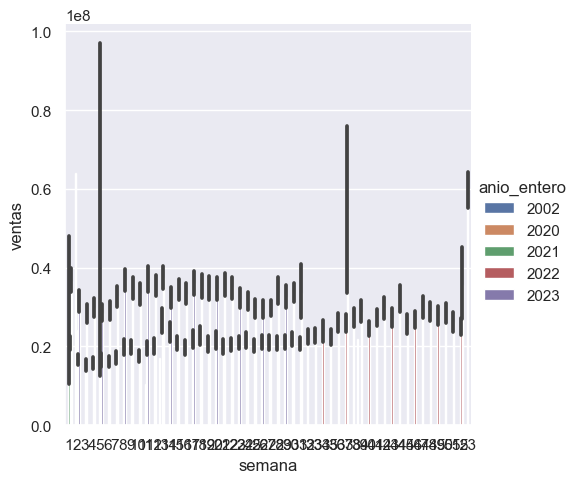

In [18]:
sns.catplot(data=df_comercial,x="semana",y="ventas",hue="anio_entero",kind="bar")

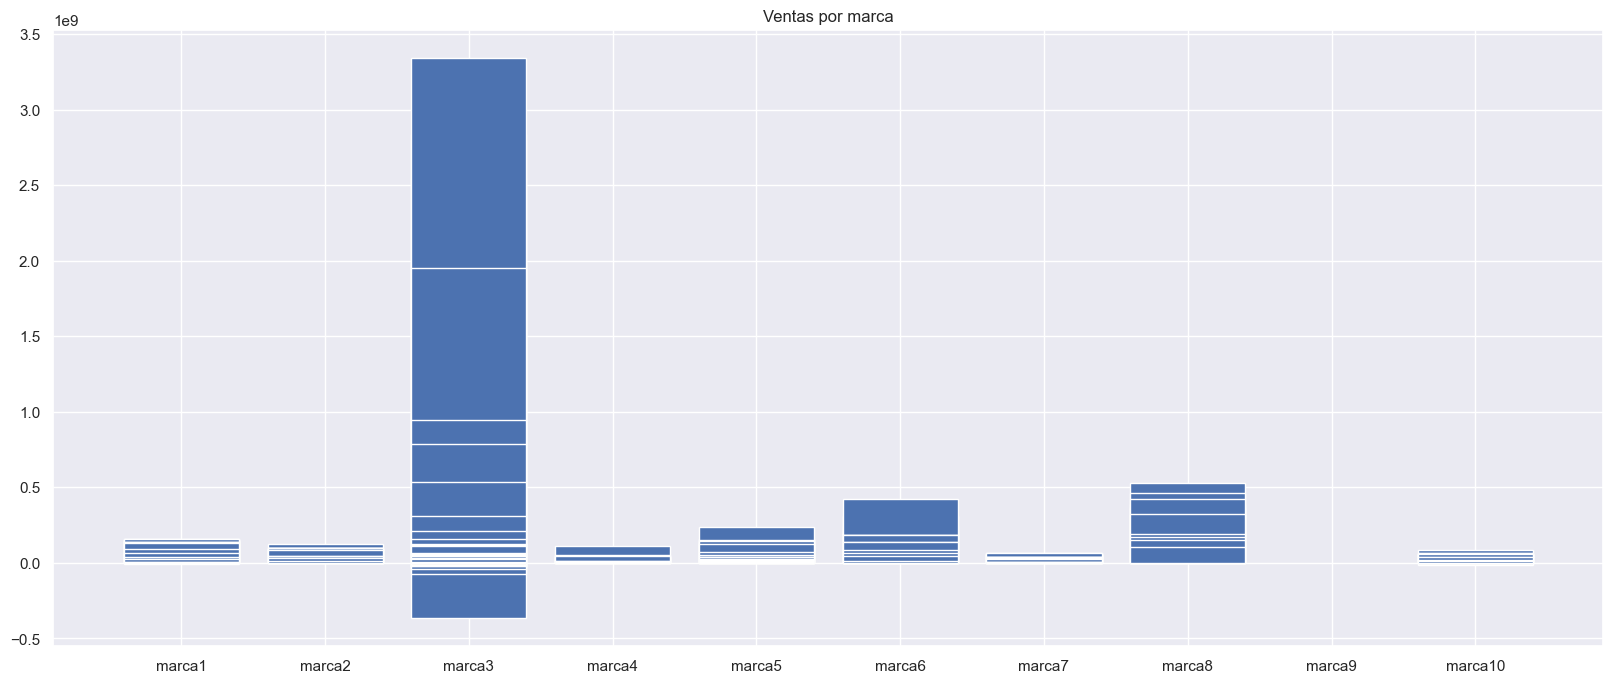

In [24]:
plt.figure(figsize=(20, 8))
plt.bar(df_comercial["marca"],df_comercial["ventas"])
plt.title("Ventas por marca")
plt.show()

In [33]:
df_main_marca=df_comercial.loc[(df_comercial["marca"]=="marca3")|(df_comercial["marca"]=="marca6")|(df_comercial["marca"]=="marca8")|(df_comercial["marca"]=="marca5")]

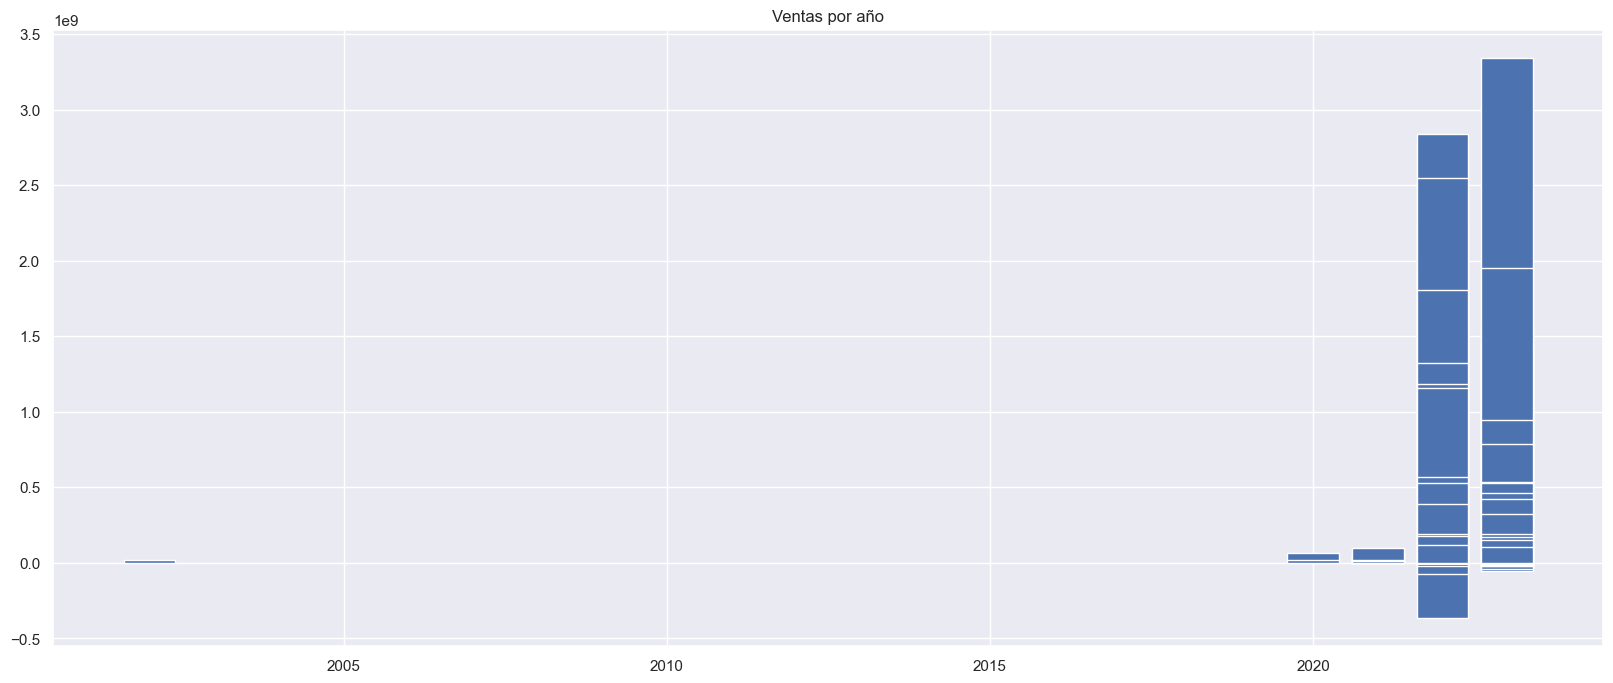

In [34]:
plt.figure(figsize=(20, 8))
plt.bar(df_main_marca["anio_entero"],df_main_marca["ventas"])
plt.title("Ventas por año")
plt.show()

In [36]:
df_main_anio=df_main_marca.loc[(df_main_marca["anio_entero"]==2022)|(df_main_marca["anio_entero"]==2023)]

In [38]:
df_main_anio['anio_entero']=df_main_anio['anio_entero'].astype("str")

In [45]:
df_main_anio['ventas']=df_main_anio['ventas']/1000000

In [46]:
prueba=df_main_anio.groupby(by=["marca","anio_entero"])["ventas"].sum ()

In [47]:
prueba

marca   anio_entero
marca3  2022           2.393941e+06
        2023           1.757878e+06
marca5  2022           7.275229e+04
        2023           5.310165e+04
marca6  2022           1.752580e+05
        2023           1.188792e+05
marca8  2022           6.338433e+04
        2023           5.781360e+04
Name: ventas, dtype: float64

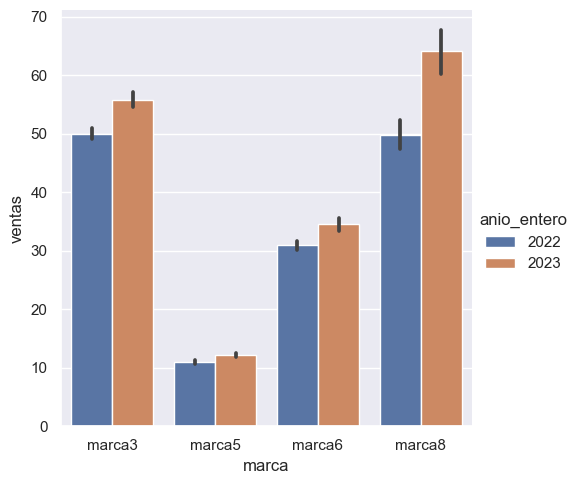

In [49]:
sns.catplot(data=df_main_anio,x="marca",y="ventas",hue="anio_entero",kind="bar")

In [52]:
#plt.figure(figsize=(20, 8))
plt.bar(df_main_anio["marca"],df_main_anio["ventas"],label=df_main_anio["anio_entero"])
plt.legend(loc='best')
plt.title("Ventas por año (en millones)")
plt.show()

ValueError: Image size of 563x2198996 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

In [ ]:
marcas_frec_nr = df_comercial["ventas"].sum()
neighbourhood_frec_nr.plot(kind="bar", color="steelblue")
plt.show()